<a href="https://colab.research.google.com/github/xingyunsuper/Case-Studies/blob/main/LNM_Final__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package and Data:


In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from matplotlib.colors import ListedColormap
import math
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [ ]:
pd.set_option('display.max_columns', None)

salary = pd.read_csv("/content/drive/Shareddrives/Linear Non-Linear Models/salary_data.csv")
salary.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.40,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.50,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.80,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.00,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.80,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.90,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [ ]:
salary.shape

(742, 28)

In [ ]:
# Drop unnecessary columns

# Job description: require NLP to process the data
# Headquarters: unnecessary columns similar to location
# Salary Estimate: same information as min_salary, max_salary, avg_salary
# Sector: similar information; we can use industry variable instead
# company_txt: same as company name
# job_state: same information as Location
# Founded

salary = salary.drop(["Job Description", "Headquarters","Founded", "Salary Estimate", "Sector", "job_state", "company_txt"], axis = 1)
salary.head(5)

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.80,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,0,47,1,0,0,0,1
1,Healthcare Data Scientist,3.40,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),-1,0,0,63,112,87.50,0,36,1,0,0,0,0
2,Data Scientist,4.80,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),-1,0,0,80,90,85.00,1,10,1,0,1,0,1
3,Data Scientist,3.80,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50,1,55,1,0,0,0,0
4,Data Scientist,2.90,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50,1,22,1,0,0,0,1


In [ ]:
# check data types

data_types = salary.dtypes
print(data_types)

Job Title             object
Rating               float64
Company Name          object
Location              object
Size                  object
Type of ownership     object
Industry              object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
dtype: object


In [ ]:
# check for missing values

missing_values = salary.isnull().sum()
print(missing_values)

Job Title            0
Rating               0
Company Name         0
Location             0
Size                 0
Type of ownership    0
Industry             0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64


### Size

In [ ]:
salary["Size"].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

In [ ]:
# drop Unknown and -1
salary = salary[(salary['Size'] != 'Unknown') & (salary['Size'] != '-1')]

In [ ]:
salary["Industry"].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      40
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing                 8
Financial Analytics & Research          

### Company Name

In [ ]:
# Remove any numerical value followed by a decimal point and a digit from the 'company name' column
salary['Company Name'] = salary['Company Name'].str.replace(r'\d+\.\d+', '', regex=True)

# Remove the '\n' string from the 'company name' column
salary['Company Name'] = salary['Company Name'].str.replace('\n', '')

# Print the updated 'company name' column
print(salary['Company Name'])


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Name, Length: 732, dtype: object


### Location

In [ ]:
salary["Location"].value_counts()

New York, NY                         54
San Francisco, CA                    49
Cambridge, MA                        40
Chicago, IL                          32
Boston, MA                           23
                                     ..
Santa Fe Springs, Los Angeles, CA     1
Kansas City, MO                       1
Columbia, SC                          1
Red Bank, NJ                          1
Olympia, WA                           1
Name: Location, Length: 200, dtype: int64

In [ ]:
# Split the 'Location' column into two columns 'City' and 'State'
salary[['Job City', 'Job State']] = salary['Location'].str.split(', ', n=1, expand=True)


In [ ]:
# Drop the Location
salary = salary.drop(["Location"], axis = 1)

In [ ]:
salary.head(5)

,Job Title,Rating,Company Name,Size,Type of ownership,Industry,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,Job City,Job State
0,Data Scientist,3.80,Tecolote Research,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,0,47,1,0,0,0,1,Albuquerque,NM
1,Healthcare Data Scientist,3.40,University of Maryland Medical System,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),-1,0,0,63,112,87.50,0,36,1,0,0,0,0,Linthicum,MD
2,Data Scientist,4.80,KnowBe4,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),-1,0,0,80,90,85.00,1,10,1,0,1,0,1,Clearwater,FL
3,Data Scientist,3.80,PNNL,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.50,1,55,1,0,0,0,0,Richland,WA
4,Data Scientist,2.90,Affinity Solutions,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.50,1,22,1,0,0,0,1,New York,NY


### Type of ownership

In [ ]:
salary["Type of ownership"].value_counts()

Company - Private                 401
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
Name: Type of ownership, dtype: int64

In [ ]:
# drop Unknown
salary = salary[(salary['Type of ownership'] != 'Unknown')]

### Competitors

In [ ]:
salary["Competitors"].value_counts()

-1                                                                                              449
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
BrowserStack, Selenium Master, Perfecto Mobile                                                    1
Boeing, Northrop Grumman, Raytheon                                                                1
Unilever, Procter & Gamble, Henkel                                                                1
TASC, Vencore, Booz Allen Hamilton                                                                1


In [ ]:
# -1 meaning that the company does not have competitors
# we will replace -1 with 0 and company that has competitors replace with 1

salary['Competitors'] = salary['Competitors'].replace({'-1': 0, '[^0-9]+': 1}, regex=True)


In [ ]:
salary.head(5)

,Job Title,Rating,Company Name,Size,Type of ownership,Industry,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,Job City,Job State
0,Data Scientist,3.80,Tecolote Research,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,0,53,91,72.00,0,47,1,0,0,0,1,Albuquerque,NM
1,Healthcare Data Scientist,3.40,University of Maryland Medical System,10000+ employees,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),0,0,0,63,112,87.50,0,36,1,0,0,0,0,Linthicum,MD
2,Data Scientist,4.80,KnowBe4,501 to 1000 employees,Company - Private,Security Services,$100 to $500 million (USD),0,0,0,80,90,85.00,1,10,1,0,1,0,1,Clearwater,FL
3,Data Scientist,3.80,PNNL,1001 to 5000 employees,Government,Energy,$500 million to $1 billion (USD),1,0,0,56,97,76.50,1,55,1,0,0,0,0,Richland,WA
4,Data Scientist,2.90,Affinity Solutions,51 to 200 employees,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,1,0,0,86,143,114.50,1,22,1,0,0,0,1,New York,NY


### Age

In [ ]:
salary['age'].describe()

count   731.00
mean     47.28
std      53.88
min      -1.00
25%      12.00
50%      24.00
75%      59.00
max     276.00
Name: age, dtype: float64

In [ ]:
salary['age'] = salary['age'].loc[(salary['age'] >= 20) & (salary['age'] <= 80)]

### Rating

In [ ]:
salary['Rating'].describe()

count   731.00
mean      3.67
std       0.64
min      -1.00
25%       3.30
50%       3.70
75%       4.00
max       5.00
Name: Rating, dtype: float64

In [ ]:
salary['Rating'] = salary['Rating'].loc[(salary['Rating'] >= 0)]

### Industry

In [ ]:
salary['Industry'].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      40
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing                 8
Financial Analytics & Research          

### Revenue

In [ ]:
salary['Revenue'].value_counts()

Unknown / Non-Applicable            194
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$2 to $5 billion (USD)               39
$25 to $50 million (USD)             39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

### Job Title

In [ ]:
salary['Job Title'].value_counts()

Data Scientist                            128
Data Engineer                              53
Senior Data Scientist                      34
Data Analyst                               15
Senior Data Engineer                       14
                                         ... 
Senior Spark Engineer (Data Science)        1
Senior Data Scientist Statistics            1
MongoDB Data Engineer II                    1
Customer Data Scientist/Sales Engineer      1
Machine Learning Engineer (NLP)             1
Name: Job Title, Length: 259, dtype: int64

In [ ]:
salary['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

# EDA

In [ ]:
salary.dtypes

Job Title             object
Rating               float64
Company Name          object
Size                  object
Type of ownership     object
Industry              object
Revenue               object
Competitors            int64
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
same_state             int64
age                  float64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
Job City              object
Job State             object
dtype: object

In [ ]:
salary.describe(include='all')

,Job Title,Rating,Company Name,Size,Type of ownership,Industry,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,Job City,Job State
count,731,728.00,731,731,731,731,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00,288.00,731.00,731.00,731.00,731.00,731.00,731,731
unique,259,NaN,338,7,9,60,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194,38
top,Data Scientist,NaN,MassMutual,1001 to 5000 employees,Company - Private,Biotech & Pharmaceuticals,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,CA
freq,128,NaN,14,150,401,112,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,151
mean,NaN,3.68,NaN,NaN,NaN,NaN,NaN,0.39,0.03,0.01,73.61,127.09,100.35,0.57,40.55,0.53,0.00,0.23,0.24,0.52,NaN,NaN
std,NaN,0.57,NaN,NaN,NaN,NaN,NaN,0.49,0.18,0.10,31.65,47.13,38.92,0.50,15.52,0.50,0.05,0.42,0.43,0.50,NaN,NaN
min,NaN,1.90,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,10.00,16.00,13.50,0.00,20.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
25%,NaN,3.30,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,52.00,96.00,73.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
50%,NaN,3.70,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,69.00,124.00,96.50,1.00,38.00,1.00,0.00,0.00,0.00,1.00,NaN,NaN
75%,NaN,4.00,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,90.00,155.00,122.50,1.00,53.00,1.00,0.00,0.00,0.00,1.00,NaN,NaN


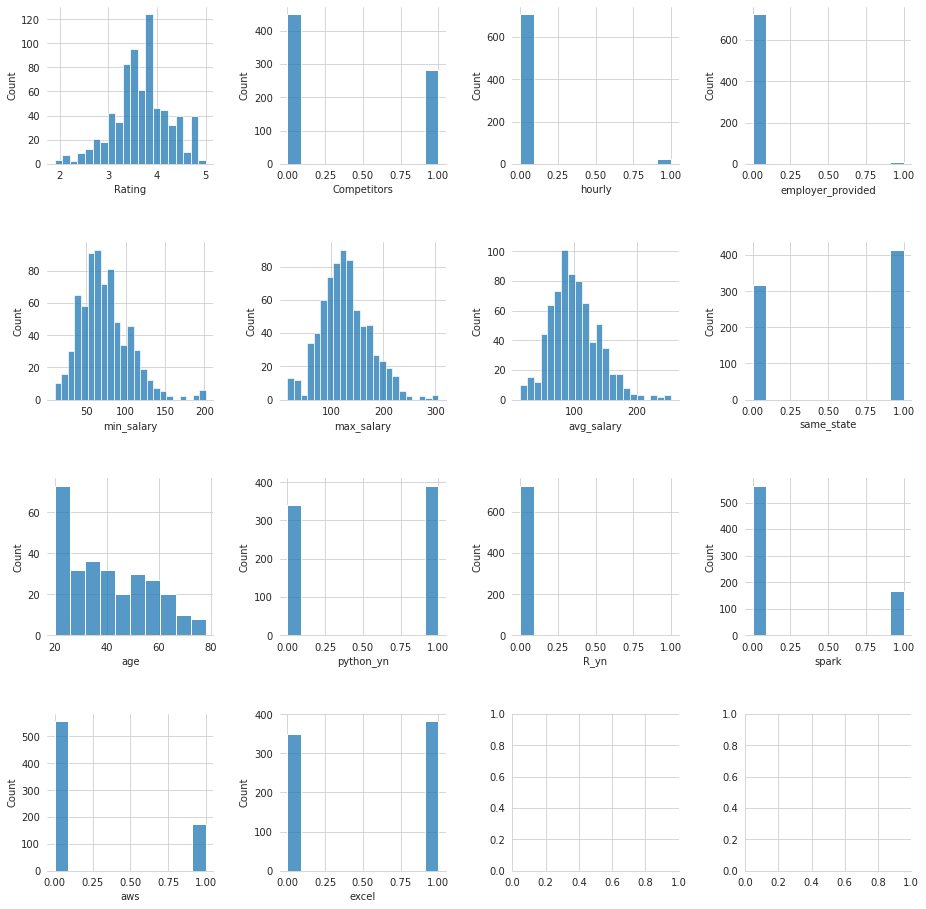

In [ ]:
cate = []
nume = []
for column in salary.columns:
    if salary[column].dtypes == 'object':
        cate.append(column)
    else:
        nume.append(column)

m=math.ceil(math.sqrt(len(nume)))
n=math.ceil(len(nume)/m)


fig, axes = plt.subplots(m,n,figsize=(15,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)
sns.despine(left=True)
for i in range(m):
    for j in range(n):
        sns.histplot(ax=axes[i,j], data=salary, x=nume[i*n+j])
        if i*n+j==len(nume)-1:
            break

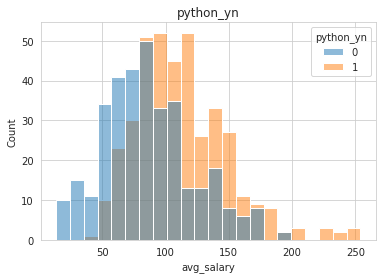

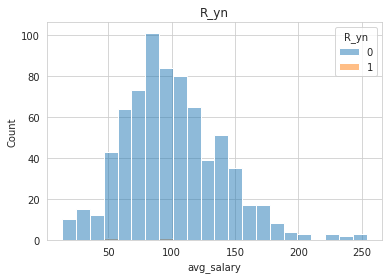

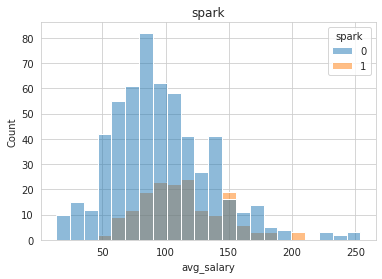

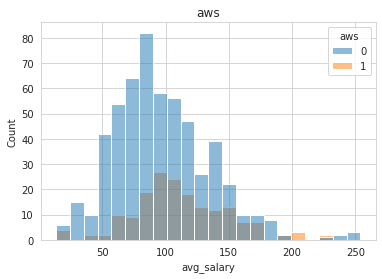

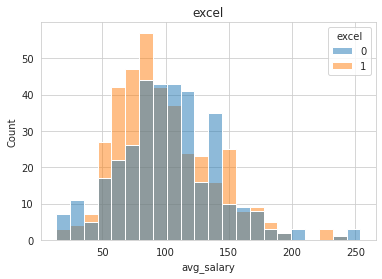

In [ ]:
sns.histplot(data = salary, x = 'avg_salary', hue = 'python_yn').set(title='python_yn')
plt.show()

sns.histplot(data = salary, x = 'avg_salary', hue = 'R_yn').set(title='R_yn')
plt.show()

sns.histplot(data = salary, x = 'avg_salary', hue = 'spark').set(title='spark')
plt.show()

sns.histplot(data = salary, x = 'avg_salary', hue = 'aws').set(title='aws')
plt.show()

sns.histplot(data = salary, x = 'avg_salary', hue = 'excel').set(title='excel')
plt.show()

In [ ]:
cate= ['Job Title',
 'Company Name',
 'Size',
 'Type of ownership',
 'Industry',
 'Revenue',
 'Job State',
 'Job City']

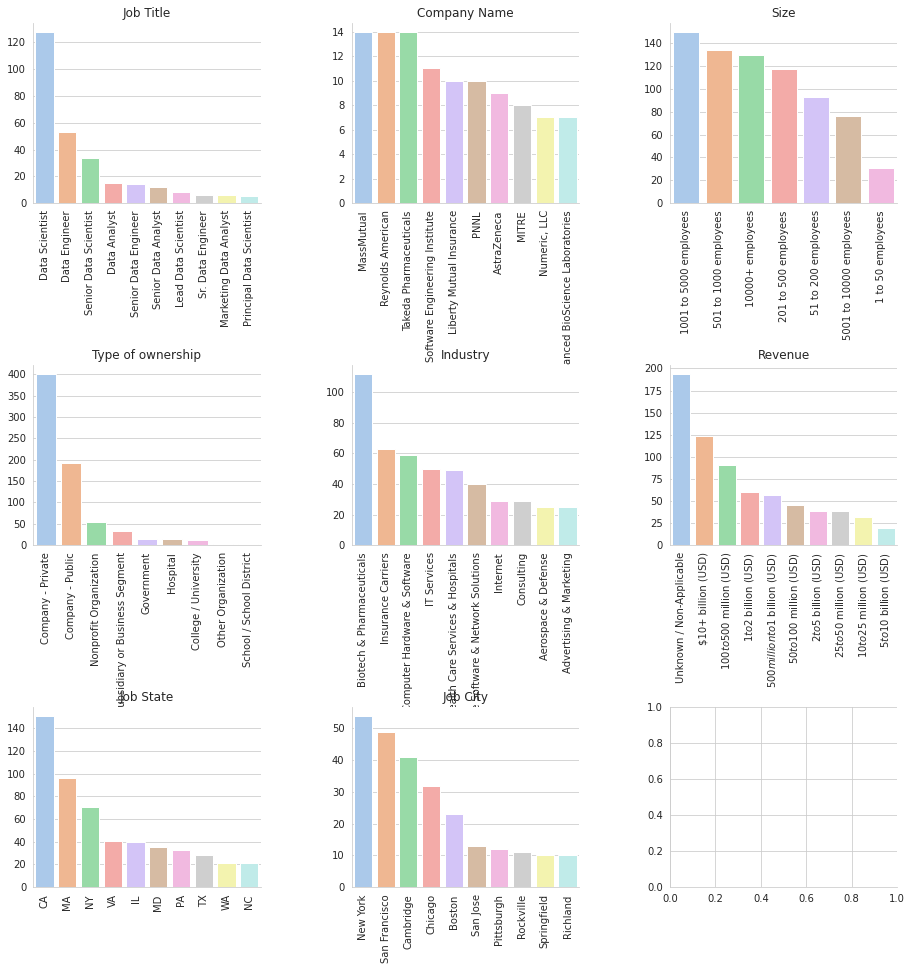

In [ ]:
m=math.ceil(math.sqrt(len(cate)))
n=math.ceil(len(cate)/m)
fig, axes = plt.subplots(m,n,figsize=(15,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.9)
sns.despine()
for i in range(m):
    for j in range(n):
        sns.barplot(x= salary[cate[i*n+j]].value_counts()[:10].index,
                    y= salary[cate[i*n+j]].value_counts()[:10].values,
                   ax=axes[i,j],
                   palette="pastel")
        axes[i,j].tick_params(axis='x', labelrotation=90)
        axes[i,j].title.set_text(cate[i*n+j])
        if i*n+j==len(cate)-1:
            break

In [ ]:
import plotly.express as px
fig = px.choropleth(height = 600, width = 600,
    locations= salary.groupby('Job State')['avg_salary'].mean().index, # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in locations
    color = salary.groupby('Job State')['avg_salary'].mean(),
    color_continuous_scale=px.colors.sequential.YlGnBu,
    labels= {'color':'K$/Year'},
    title= 'Average Salary per state'
                   )
fig.update_layout(
    geo_scope='usa', # limite map scope to USA,
)
fig.show()

In [ ]:
import plotly.express as px
fig = px.choropleth(height = 600, width = 600,
    locations= salary.groupby('Job State')['min_salary'].mean().index, # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in locations
    color = salary.groupby('Job State')['min_salary'].mean(),
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels= {'color':'K$/Year'},
    title= 'Min Salary per state'
                   )
fig.update_layout(
    geo_scope='usa', # limite map scope to USA,
)
fig.show()

In [ ]:
import plotly.express as px
fig = px.choropleth(height = 600, width = 600,
    locations= salary.groupby('Job State')['max_salary'].mean().index, # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in locations
    color = salary.groupby('Job State')['max_salary'].mean(),
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels= {'color':'K$/Year'},
    title= 'Max Salary per state'
                   )
fig.update_layout(
    geo_scope='usa', # limite map scope to USA,
)
fig.show()

In [ ]:
salary_group = salary.groupby('Job State')[['python_yn','spark','aws','excel']].sum().loc[['CA', 'MA','NY','VA','IL'], :].reset_index()
salary_group
fig = px.bar(height = 600, width = 600,data_frame=salary_group, x= "Job State", y=['python_yn', 'spark', 'aws', 'excel'], barmode= "group",color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title="States", yaxis_title="Programing skill required", title = 'Skills Required by States')
fig.show()

In [ ]:
selected_states = ['CA', 'MA', 'NY', 'VA', 'IL']
large_states = salary[salary['Job State'].isin(selected_states)]

In [ ]:
grouped = large_states.groupby(['Job State', 'Job Title'])['avg_salary'].mean().reset_index()
grouped.head()

,Job State,Job Title,avg_salary
0,CA,Analytics Manager - Data Mart,64.00
1,CA,Associate Environmental Scientist - Wildlife B...,51.00
2,CA,Associate Research Scientist I (Protein Expres...,87.50
3,CA,Associate Scientist,81.50
4,CA,"Associate Scientist / Sr. Associate Scientist,...",92.00


In [ ]:
## visualize salary of tech jobs in large states.
def plotstatejobinfo(feature):
    grouped = large_states.groupby(['Job State', 'Job Title'])[feature].mean().reset_index()
    plot = px.bar(grouped, x='Job Title', y=feature, animation_frame='Job State', animation_group='Job Title')
    plot.update_layout(title_text= f'Tech Job - {feature} by State', yaxis=dict(zeroline=True,range=[0, 300]),height = 1200, width = 1500)
    plot.show()

In [ ]:
plotstatejobinfo('avg_salary')

In [ ]:
plotstatejobinfo('min_salary')

In [ ]:
plotstatejobinfo('max_salary')

In [ ]:
## see rev vs. salary in large states
revenue_sort = ["Unknown / Non-Applicable",
                                             "Less than $1 million (USD)",
                                             "$1 to $5 million (USD)",
                                             "$5 to $10 million (USD)",
                                             "$10 to $25 million (USD)",
                                             "$25 to $50 million (USD)",
                                             "$50 to $100 million (USD)",
                                             "$100 to $500 million (USD)",
                                             "$500 million to $1 billion (USD)",
                                             "$1 to $2 billion (USD)",
                                             "$2 to $5 billion (USD)",
                                             "$5 to $10 billion (USD)",
                                             "$10+ billion (USD)"
                                             ]
grouped2 = large_states.groupby(['Job State', 'Revenue'])['avg_salary'].mean().reset_index()
grouped2["Revenue"] = pd.Categorical(grouped2["Revenue"], categories = revenue_sort)
grouped2.sort_values(by = "Revenue")
grouped2.head()
plot2 = px.scatter(grouped2, x='Revenue', y='avg_salary', color='Job State',
                category_orders={"Revenue": ["Unknown / Non-Applicable",
                                             "Less than $1 million (USD)",
                                             "$1 to $5 million (USD)",
                                             "$5 to $10 million (USD)",
                                             "$10 to $25 million (USD)",
                                             "$25 to $50 million (USD)",
                                             "$50 to $100 million (USD)",
                                             "$100 to $500 million (USD)",
                                             "$500 million to $1 billion (USD)",
                                             "$1 to $2 billion (USD)",
                                             "$2 to $5 billion (USD)",
                                             "$5 to $10 billion (USD)",
                                             "$10+ billion (USD)"
                                             ]},height=750, width = 800)
plot2.show()

In [ ]:
grouped2 = large_states.groupby(['Job State', 'Revenue'])['avg_salary'].mean()
grouped2.head()

Job State  Revenue                   
CA         $1 to $2 billion (USD)       106.31
           $1 to $5 million (USD)       104.33
           $10 to $25 million (USD)     118.33
           $10+ billion (USD)           140.88
           $100 to $500 million (USD)    91.36
Name: avg_salary, dtype: float64

In [ ]:
## see comp size vs. salary in large states
grouped3 = large_states.groupby(['Job State', 'Size'])['avg_salary'].mean().reset_index()
grouped3.head()
plot3 = px.line(grouped3, x='Size', y='avg_salary', color='Job State', height=500, width = 800)
plot3.show()

In [ ]:
### see rating vs. salary in large states
grouped2 = large_states.groupby(['Job State', 'Rating'])['avg_salary'].mean().reset_index()
grouped2.head()
plot2 = px.line(grouped2, x='Rating', y='avg_salary', color='Job State', height=500, width = 800)
plot2.show()

# Feature Selection


In [ ]:
tech = ['Computer Hardware & Software', 'IT Services', 'Enterprise Software & Network Solutions', 'Internet',\
        'Video Games', 'TV Broadcast & Cable Networks','Architectural & Engineering Services',\
        'Telecommunications Services']
financial = ['Insurance Carriers', 'Banks & Credit Unions', 'Financial Analytics & Research', 'Lending', \
             'Investment Banking & Asset Management', 'Stock Exchanges', 'Brokerage Services', 'Metals Brokers',\
            'Financial Transaction Processing', 'Accounting']
manufacturing = ['Telecommunications Manufacturing', 'Industrial Manufacturing',\
                 'Transportation Equipment Manufacturing', 'Food & Beverage Manufacturing', 'Construction'\
                'Renewable Energy Equipment & Services', 'Consumer Products Manufacturing','Aerospace & Defense',\
                 'Logistics & Supply Chain', 'Mining', 'Gas Stations','Energy', 'Health Care Products Manufacturing',\
                'Trucking']
health = ['Biotech & Pharmaceuticals', 'Health Care Services & Hospitals', 'Health, Beauty, & Fitness']
other = ['Advertising & Marketing', 'Staffing & Outsourcing', 'Travel Agencies',\
          'Transportation Management',  'Wholesale', 'Other Retail Stores', 'Real Estate',\
         'Security Services', 'Sporting Goods Stores', 'Auctions & Galleries',  \
         'Religious Organizations', 'Department, Clothing, & Shoe Stores', 'Consumer Product Rental', \
         'Education Training Services', 'Beauty & Personal Accessories Stores',  \
         'Social Assistance', 'K-12 Education', 'Gambling', 'Motion Picture Production & Distribution',\
         'Colleges & Universities', 'Farm Support Services', 'Research & Development', '-1']

salary['industry_category'] = ''

for index, row in salary.iterrows():
    industry = row['Industry']
    if industry in tech:
        salary.at[index, 'industry_category'] = 'Technology'
    elif industry in financial:
        salary.at[index, 'industry_category'] = 'Financial'
    elif industry in health:
        salary.at[index, 'industry_category'] = 'Healthcare, Pharma, Biotech'
    elif industry in manufacturing:
        salary.at[index, 'industry_category'] = 'Manufacturing, Transportation, Energy'
    else:
        salary.at[index, 'industry_category'] = 'Other'


In [ ]:
salary["industry_category"].value_counts()

Technology                               190
Other                                    186
Healthcare, Pharma, Biotech              162
Financial                                108
Manufacturing, Transportation, Energy     85
Name: industry_category, dtype: int64

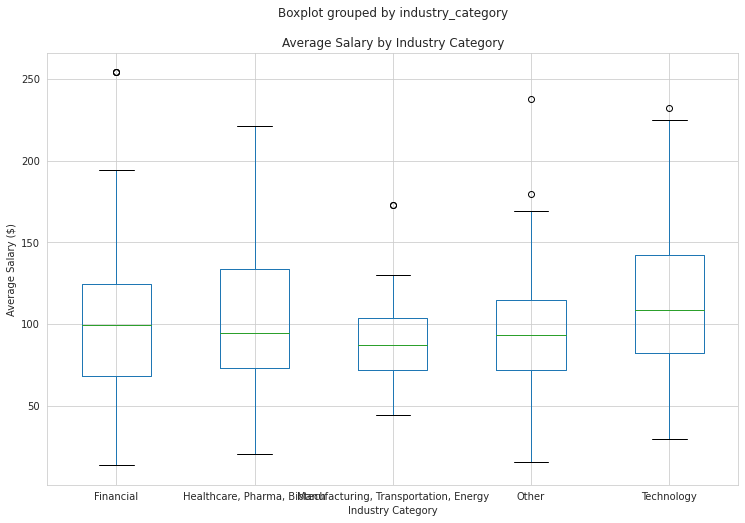

In [ ]:
salary.boxplot(column='avg_salary', by='industry_category', figsize=(12,8))

plt.title('Average Salary by Industry Category')
plt.xlabel('Industry Category')
plt.ylabel('Average Salary ($)')

plt.show()

In [ ]:
tech = ['Computer Hardware & Software', 'IT Services','Enterprise Software & Network Solutions', 'Internet']

salary['is_tech_job'] = salary['Industry'].apply(lambda x: x in tech)

In [ ]:
salary['is_tech_job'].value_counts()

False    553
True     178
Name: is_tech_job, dtype: int64

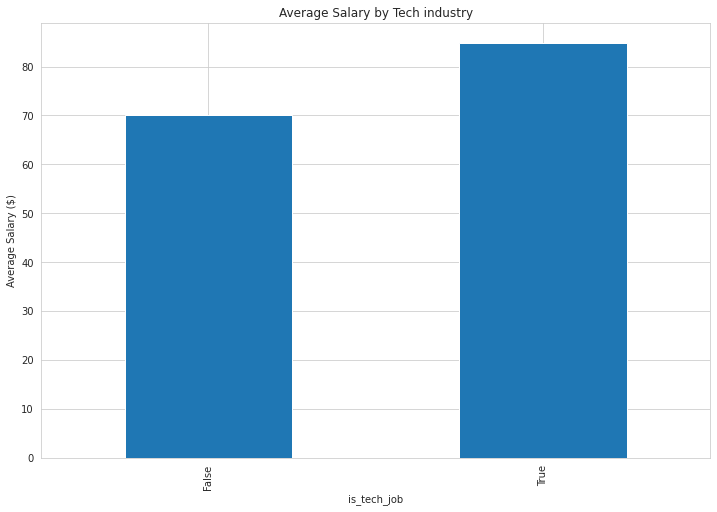

In [ ]:
mean_salary_by_tech = salary.groupby('is_tech_job')['min_salary'].mean()

mean_salary_by_tech.plot(kind='bar', figsize=(12,8))

plt.title('Average Salary by Tech industry')
plt.xlabel('is_tech_job')
plt.ylabel('Average Salary ($)')
plt.show()

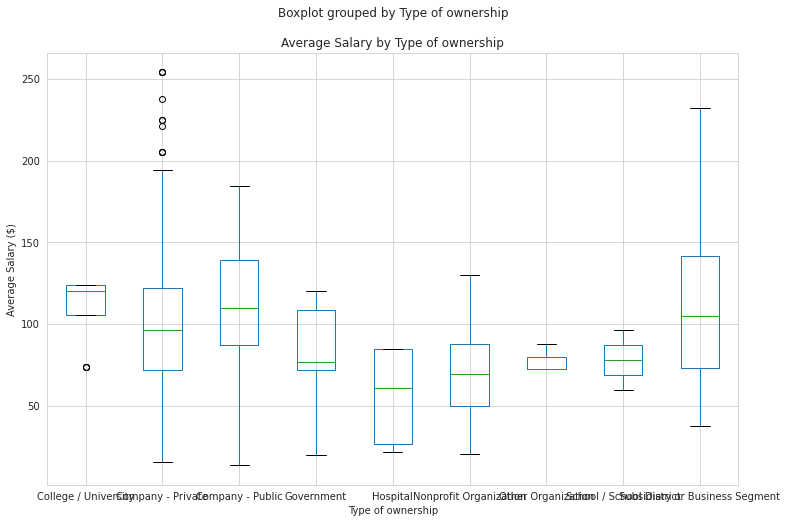

In [ ]:
salary.boxplot(column='avg_salary', by='Type of ownership', figsize=(12,8))

plt.title('Average Salary by Type of ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Average Salary ($)')

plt.show()

In [ ]:
df = salary.drop(columns = ["Job Title","Company Name","employer_provided","min_salary","max_salary","same_state","Job City","Industry","R_yn"])
df.dtypes
#"Industry_rollup"

Rating               float64
Size                  object
Type of ownership     object
Revenue               object
Competitors            int64
hourly                 int64
avg_salary           float64
age                  float64
python_yn              int64
spark                  int64
aws                    int64
excel                  int64
Job State             object
industry_category     object
is_tech_job             bool
dtype: object

In [ ]:
#factorize it by frequency
df['Size'] = df['Size'].apply(lambda x: df['Size'].value_counts().index.get_loc(x))
df['Type of ownership'] = df['Type of ownership'].apply(lambda x: df['Type of ownership'].value_counts().index.get_loc(x))
df['Revenue'] = df['Revenue'].apply(lambda x: df['Revenue'].value_counts().index.get_loc(x))
df['Job State'] = df['Job State'].apply(lambda x: df['Job State'].value_counts().index.get_loc(x))
df['industry_category'] = df['industry_category'].apply(lambda x: df['industry_category'].value_counts().index.get_loc(x))
df['is_tech_job'] = df['is_tech_job'].apply(lambda x: df['is_tech_job'].value_counts().index.get_loc(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             728 non-null    float64
 1   Size               731 non-null    int64  
 2   Type of ownership  731 non-null    int64  
 3   Revenue            731 non-null    int64  
 4   Competitors        731 non-null    int64  
 5   hourly             731 non-null    int64  
 6   avg_salary         731 non-null    float64
 7   age                288 non-null    float64
 8   python_yn          731 non-null    int64  
 9   spark              731 non-null    int64  
 10  aws                731 non-null    int64  
 11  excel              731 non-null    int64  
 12  Job State          731 non-null    int64  
 13  industry_category  731 non-null    int64  
 14  is_tech_job        731 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 107.5 KB


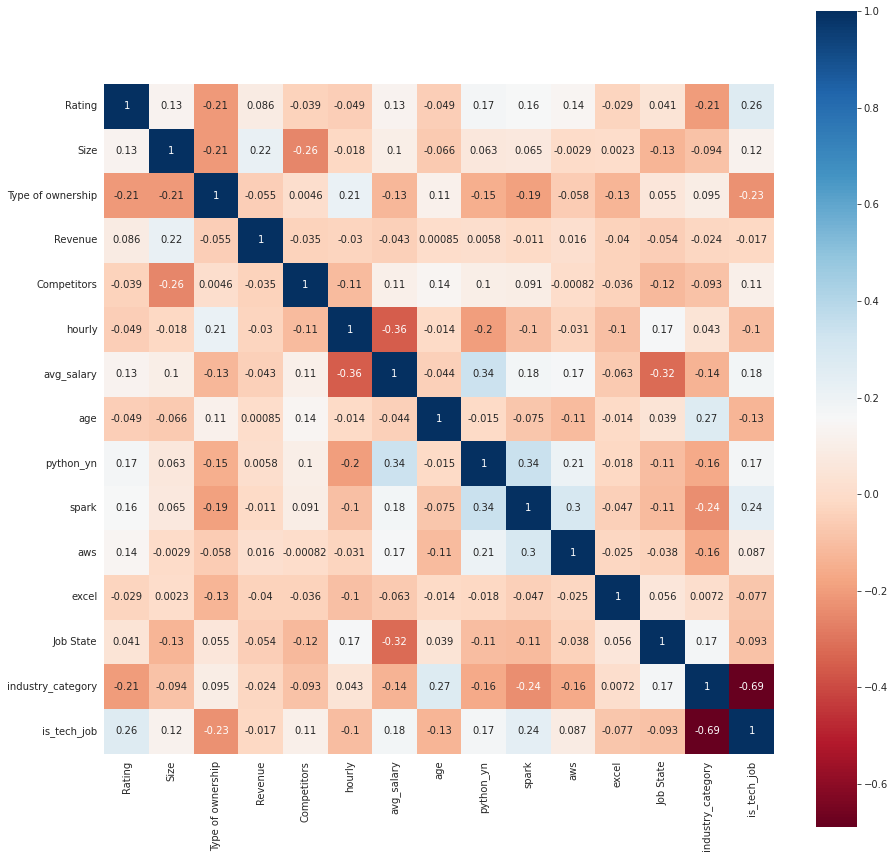

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, square=True, cmap = 'RdBu',annot = True);

<AxesSubplot:>

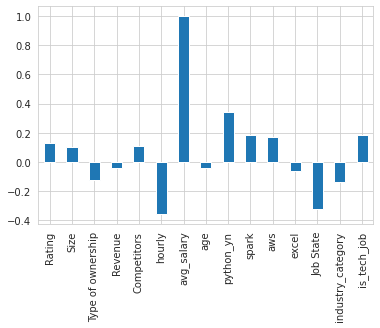

In [ ]:
df.corr()['avg_salary'].plot.bar()

# Prepare data for ML


In [ ]:
df['age'].fillna(df['age'].median(), inplace = True)
df['Rating'].fillna(df['Rating'].median(), inplace = True)

In [ ]:
x = df.drop(columns = ["avg_salary"])
y = df["avg_salary"]

In [ ]:
x.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State,industry_category,is_tech_job
0,3.80,1,0,5,0,0,47.00,1,0,0,1,31,4,0
1,3.40,2,7,6,0,0,36.00,1,0,0,0,5,2,0
2,4.80,1,0,2,0,0,38.00,1,1,0,1,11,1,0
3,3.80,0,4,4,1,0,55.00,1,0,0,0,8,4,0
4,2.90,4,0,0,1,0,22.00,1,0,0,1,2,1,0


In [ ]:
x.isnull().sum()

Rating               0
Size                 0
Type of ownership    0
Revenue              0
Competitors          0
hourly               0
age                  0
python_yn            0
spark                0
aws                  0
excel                0
Job State            0
industry_category    0
is_tech_job          0
dtype: int64

# Model (base): Linear Regression



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

# create a linear regression model
model_LR = sm.OLS(y_train, X_train).fit()

# print the model summary
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     13.18
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           6.31e-26
Time:                        23:53:10   Log-Likelihood:                -2155.0
No. Observations:                 438   AIC:                             4340.
Df Residuals:                     423   BIC:                             4401.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.6306     14.42

In [ ]:
# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     29.43
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.48e-29
Time:                        23:53:10   Log-Likelihood:                -2159.1
No. Observations:                 438   AIC:                             4332.
Df Residuals:                     431   BIC:                             4361.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                89.2756      4.77

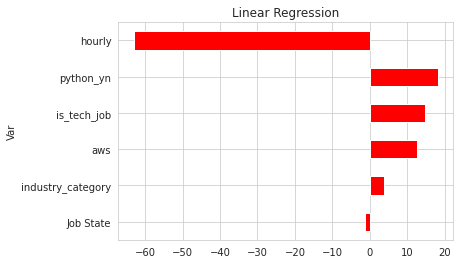

In [ ]:
# final table: backward
x = df.drop(columns = ["avg_salary","Rating","Size","Type of ownership","Revenue","Competitors","age","spark","excel"])
y = df["avg_salary"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='red')
plt.title('Linear Regression')
#fig.tight_layout()
plt.show()

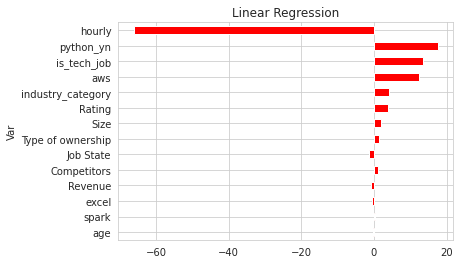

In [ ]:
# final table: include all
x = df.drop(columns = ["avg_salary"])
y = df["avg_salary"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='red')
plt.title('Linear Regression')
#fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [  3.95194248   1.93405119   1.48730628  -0.75421745   1.12971157
 -66.23118425  -0.14905649  17.62092929   0.31962677  12.48328144
  -0.47643636  -1.23171978   4.2454753   13.44143016]
Intercept: 76.63062262264864
Coefficient of determination (R^2): 0.253
Mean squared error (MSE): 1051.087
Root mean squared error (RMSE) : 32.420


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [  3.95194248   1.93405119   1.48730628  -0.75421745   1.12971157
 -66.23118425  -0.14905649  17.62092929   0.31962677  12.48328144
  -0.47643636  -1.23171978   4.2454753   13.44143016]
Intercept: 76.63062262264864
Coefficient of determination (R^2): 0.253
Mean squared error (MSE): 1051.087
Root mean squared error (RMSE) : 32.420


### Industry: Technology

In [ ]:
x = df[df["industry_category"]==0]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==0]
y = y["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
X_train.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State
224,3.40,4,0,0,0,0,38.00,1,0,0,1,0
18,4.20,4,0,0,0,0,38.00,0,0,0,0,0
214,3.90,4,0,0,0,0,38.00,1,1,0,0,1
433,2.70,2,1,0,0,0,38.00,1,1,1,0,0
695,4.30,0,1,4,1,0,21.00,0,0,1,1,2


In [ ]:
X_train = sm.add_constant(X_train)
model_LR = sm.OLS(y_train, X_train).fit()

# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     13.21
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           8.28e-09
Time:                        23:53:11   Log-Likelihood:                -558.78
No. Observations:                 114   AIC:                             1128.
Df Residuals:                     109   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               103.2642      7.14

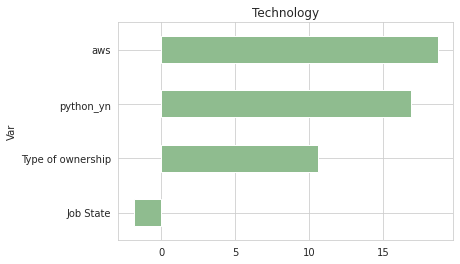

In [ ]:
x = x[["Type of ownership","python_yn","aws","Job State"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='darkseagreen')
plt.title('Technology')
#fig.tight_layout()
plt.show()



In [ ]:
y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [10.61851702 16.86349289 18.68091062 -1.8537512 ]
Intercept: 103.26421218940281
Coefficient of determination (R^2): 0.291
Mean squared error (MSE): 1268.769
Root mean squared error (RMSE) : 35.620


### Industry: Finance

In [ ]:
x = df[df["industry_category"]==1]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==1]
y = y["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
X_train.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State
5,3.40,3,1,3,1,0,20.00,1,0,1,1,7
209,3.80,0,0,6,1,0,38.00,0,0,0,1,2
508,3.50,3,1,0,0,0,38.00,1,1,1,1,2
724,3.30,6,0,0,0,1,44.00,0,0,0,1,1
141,4.20,2,2,0,0,0,38.00,0,0,1,1,17


In [ ]:
X_train = sm.add_constant(X_train)
model_LR = sm.OLS(y_train, X_train).fit()

# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     8.239
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           5.55e-05
Time:                        23:53:11   Log-Likelihood:                -538.62
No. Observations:                 111   AIC:                             1085.
Df Residuals:                     107   BIC:                             1096.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.4789     11.617     11.145      0.0

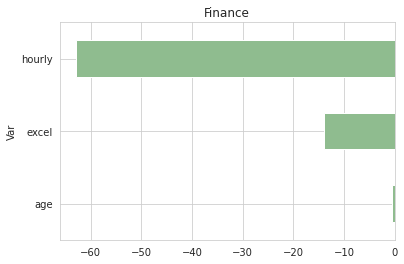

In [ ]:
x = x[["hourly","age","excel"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='darkseagreen')
plt.title('Finance')
#fig.tight_layout()
plt.show()



In [ ]:
y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [-62.95626938  -0.59237702 -13.95801451]
Intercept: 129.47887297743864
Coefficient of determination (R^2): 0.066
Mean squared error (MSE): 852.053
Root mean squared error (RMSE) : 29.190


### Industry: Manufacturing

In [ ]:
x = df[df["industry_category"]==2]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==2]
y = y["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
X_train.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State
357,3.60,0,2,2,0,1,38.00,0,0,0,0,24
716,4.00,1,0,0,1,0,38.00,0,0,1,1,0
498,3.90,2,1,1,1,0,38.00,0,0,0,0,5
467,3.30,2,5,4,0,0,38.00,0,0,0,0,2
392,2.70,3,0,7,0,0,59.00,0,0,0,0,5


In [ ]:
X_train = sm.add_constant(X_train)
model_LR = sm.OLS(y_train, X_train).fit()

# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     28.08
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.19e-17
Time:                        23:53:12   Log-Likelihood:                -454.26
No. Observations:                  97   AIC:                             920.5
Df Residuals:                      91   BIC:                             936.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9491     21.900      1.048      0.2

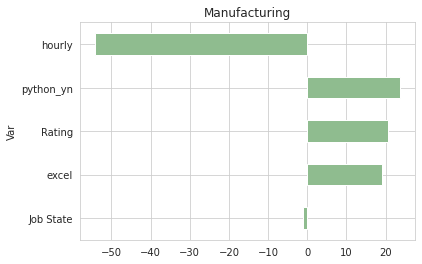

In [ ]:
x = x[["Rating","hourly","python_yn","excel","Job State"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='darkseagreen')
plt.title('Manufacturing')
#fig.tight_layout()
plt.show()



In [ ]:
y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [ 20.54614709 -54.08803751  23.60168843  19.17412643  -1.10237459]
Intercept: 22.94913447087464
Coefficient of determination (R^2): 0.510
Mean squared error (MSE): 705.778
Root mean squared error (RMSE) : 26.566


### Industry: Healthcare

In [ ]:
x = df[df["industry_category"]==3]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==3]
y = y["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
X_train.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State
550,3.40,0,0,2,0,0,32.00,0,1,0,1,1
332,3.60,5,0,1,0,0,38.00,0,0,0,1,1
325,3.60,5,0,1,0,0,38.00,0,0,0,0,1
39,3.50,3,0,2,0,0,35.00,1,0,0,1,2
166,2.70,4,4,5,0,0,69.00,1,0,0,0,15


In [ ]:
X_train = sm.add_constant(X_train)
model_LR = sm.OLS(y_train, X_train).fit()

# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     20.32
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.97e-05
Time:                        23:53:12   Log-Likelihood:                -317.38
No. Observations:                  64   AIC:                             638.8
Df Residuals:                      62   BIC:                             643.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6167      6.394     12.296      0.0

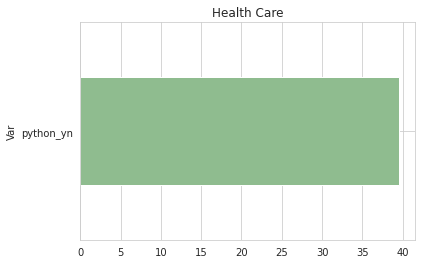

In [ ]:
x = x[["python_yn"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='darkseagreen')
plt.title('Health Care')
#fig.tight_layout()
plt.show()



In [ ]:
y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [39.54509804]
Intercept: 78.61666666666667
Coefficient of determination (R^2): 0.192
Mean squared error (MSE): 2212.546
Root mean squared error (RMSE) : 47.038


### Industry: Other

In [ ]:
x = df[df["industry_category"]==4]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==4]
y = y["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
X_train.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State
623,3.70,2,1,1,0,0,38.00,0,0,0,1,21
725,3.10,5,0,1,0,0,38.00,0,0,0,1,9
454,3.60,2,3,6,1,0,38.00,0,0,1,1,2
442,3.40,3,1,5,0,0,29.00,0,0,0,0,11
30,3.80,0,4,4,1,0,55.00,1,0,0,0,8


In [ ]:
X_train = sm.add_constant(X_train)
model_LR = sm.OLS(y_train, X_train).fit()

# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     4.015
Date:                Mon, 06 Mar 2023   Prob (F-statistic):             0.0244
Time:                        23:53:13   Log-Likelihood:                -232.58
No. Observations:                  51   AIC:                             471.2
Df Residuals:                      48   BIC:                             476.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.7501      6.270     14.951      0.0

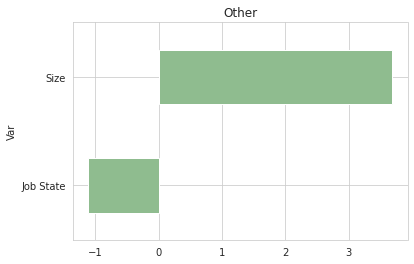

In [ ]:
x = x[["Size","Job State"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='darkseagreen')
plt.title('Other')
#fig.tight_layout()
plt.show()



In [ ]:
y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [ 3.68709631 -1.11736993]
Intercept: 93.75010780449686
Coefficient of determination (R^2): 0.100
Mean squared error (MSE): 564.644
Root mean squared error (RMSE) : 23.762


### Non-Tech

In [ ]:
x = df[df["is_tech_job"]==0]
x = x.drop(columns = ["avg_salary","is_tech_job"])
y = df[df["is_tech_job"]==0]
y = y["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
X_train.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,age,python_yn,spark,aws,excel,Job State,industry_category
96,3.20,5,2,3,1,0,62.00,1,0,0,1,3,1
283,4.10,6,0,0,0,0,38.00,0,0,1,1,0,1
25,4.00,2,1,1,0,0,38.00,1,0,1,1,1,2
411,3.90,0,2,4,1,0,73.00,1,0,1,1,7,1
460,4.00,3,0,2,1,0,38.00,0,0,0,1,2,3


In [ ]:
X_train = sm.add_constant(X_train)
model_LR = sm.OLS(y_train, X_train).fit()

# perform backward elimination
while True:
    p_values = model_LR.pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        max_p_value_index = p_values.idxmax()
        X_train = X_train.drop(max_p_value_index, axis=1)
        model_LR = sm.OLS(y_train, X_train).fit()
    else:
        break

# print the final model summary after backward elimination
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_salary   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     37.07
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.50e-25
Time:                        23:53:13   Log-Likelihood:                -1600.7
No. Observations:                 331   AIC:                             3211.
Df Residuals:                     326   BIC:                             3230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2043      3.336     30.341      0.0

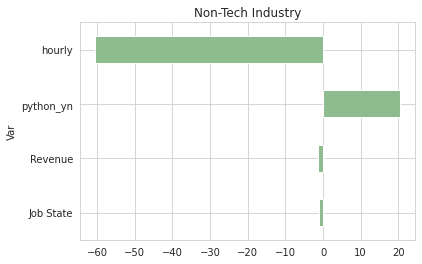

In [ ]:
x = x[["Revenue","hourly","python_yn","Job State"]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

LR_final = LinearRegression()
LR_final.fit(X_train, y_train)

LR = pd.DataFrame()
LR['Var'] = X_train.columns
# Set the variable names as the index
LR = LR.set_index('Var')
LR['beta'] = LR_final.coef_
# Get the absolute value for ranking
LR['beta_abs'] = np.abs(LR['beta'])
LR = LR.sort_values(by='beta_abs')
LR['beta'].plot.barh(color='darkseagreen')
plt.title('Non-Tech Industry')
#fig.tight_layout()
plt.show()



In [ ]:
y_pred = LR_final.predict(X_test)

print('Coefficients:', LR_final.coef_)
print('Intercept:', LR_final.intercept_)
print('Coefficient of determination (R^2): %.3f' % r2_score(y_test, y_pred))
print('Mean squared error (MSE): %.3f'% mean_squared_error(y_test, y_pred))
print('Root mean squared error (RMSE) : %.3f'% sqrt(mean_squared_error(y_test, y_pred)) )

Coefficients: [ -1.26841825 -60.43638487  20.38491292  -0.95418606]
Intercept: 101.20433785954441
Coefficient of determination (R^2): 0.200
Mean squared error (MSE): 1133.321
Root mean squared error (RMSE) : 33.665


# Model: Random Forest & Quantiles


In [ ]:
x = df.drop(columns = ["avg_salary"])
y = df["avg_salary"]

In [ ]:
##Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
clf = DecisionTreeRegressor()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Make predictions on the train data
y_pred_train=clf.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1016.4211698900265


In [ ]:
# Evaluate the test set RMSE
rmse_test_clf = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_clf = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_clf  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of decision tree: {:.2f}'.format(train_rsquare_clf))
print('Test set RMSE of clf: {:.2f}'.format(rmse_test_clf))
print('Train set RMSE of clf: {:.2f}'.format(rmse_train_clf))

Train set R square of decision tree: 0.28
Test set RMSE of clf: 31.88
Train set RMSE of clf: 7.11


In [ ]:
##xgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
xgb_reg = xgb.XGBRegressor()

# Fit the model on the training data
xgb_reg = xgb.XGBRegressor().fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=xgb_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 603.3072686450669


In [ ]:
# Evaluate the test set RMSE
rmse_test_xgb_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_xgb_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_xgb_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of xgb_reg: {:.2f}'.format(train_rsquare_xgb_reg))
print('Test set RMSE of xgb_reg: {:.2f}'.format(rmse_test_xgb_reg))
print('Train set RMSE of xgb_reg: {:.2f}'.format(rmse_train_xgb_reg))

Train set R square of xgb_reg: 0.57
Test set RMSE of xgb_reg: 24.56
Train set RMSE of xgb_reg: 7.19


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 570.4661329241595


In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.59
Test set RMSE of rf_reg: 23.88
Train set RMSE of rf_reg: 11.89


###Non-tech

In [ ]:
##Non_tech
df_non_tech = df[df['is_tech_job'] == 0]
df_non_tech.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,avg_salary,age,python_yn,spark,aws,excel,Job State,industry_category,is_tech_job
0,3.80,1,0,5,0,0,72.00,47.00,1,0,0,1,31,4,0
1,3.40,2,7,6,0,0,87.50,36.00,1,0,0,0,5,2,0
2,4.80,1,0,2,0,0,85.00,38.00,1,1,0,1,11,1,0
3,3.80,0,4,4,1,0,76.50,55.00,1,0,0,0,8,4,0
4,2.90,4,0,0,1,0,114.50,22.00,1,0,0,1,2,1,0


In [ ]:
x = df_non_tech.drop(columns = ["avg_salary", "age", "Revenue"])
y = df_non_tech["avg_salary"]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 624.9278877097341


Feature ranking:
1. hourly (0.200779)
2. Job State (0.189843)
3. Rating (0.148804)
4. Size (0.097013)
5. Type of ownership (0.085556)
6. python_yn (0.084634)
7. industry_category (0.077398)
8. excel (0.039803)
9. Competitors (0.029881)
10. aws (0.027372)
11. spark (0.018917)
12. is_tech_job (0.000000)


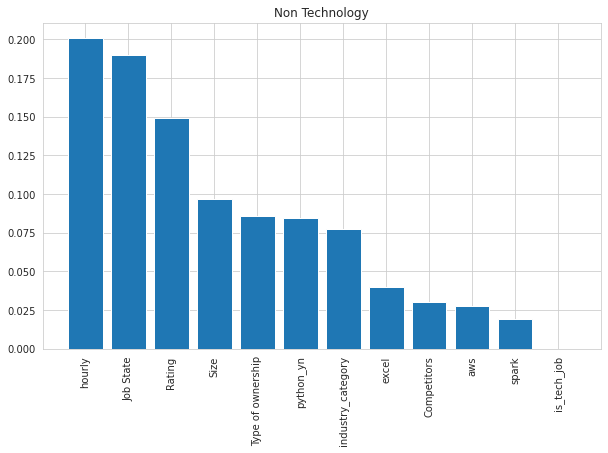

In [ ]:
# Get the feature importance scores
importances = rf_reg.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Non Technology")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.56
Test set RMSE of rf_reg: 25.00
Train set RMSE of rf_reg: 11.18


In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_train_pred_rf_reg = rf_reg.predict(X_train)

print("test set MSE:",metrics.mean_squared_error(y_test, y_pred_rf_reg))
print("train set MSE:",metrics.mean_squared_error(y_train, y_train_pred_rf_reg))

print("test set r2:",metrics.r2_score(y_test, y_pred_rf_reg))
print("train set r2:",metrics.r2_score(y_train, y_train_pred_rf_reg))

test set MSE: 624.9278877097341
train set MSE: 124.93132883099813
test set r2: 0.5586044259949768
train set r2: 0.907542260714426


In [ ]:
### Quantile for Non-Tech
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]
pred_Q = pd.DataFrame()
for pred in rf_reg.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)

RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,222.00,222.00,222.00,222.00,222.00,68.00,222.00
mean,68.71,85.52,95.41,107.42,134.93,96.47,66.22
std,24.26,28.00,31.14,32.06,40.19,31.19,37.43
min,13.50,20.50,20.50,25.00,26.50,27.50,0.00
25%,51.50,68.50,80.83,90.00,114.95,75.38,40.08
50%,68.50,85.00,96.00,107.00,137.08,95.50,62.20
75%,84.08,99.00,112.50,124.00,161.50,110.62,84.00
max,191.78,194.50,216.32,224.25,254.00,179.50,197.00


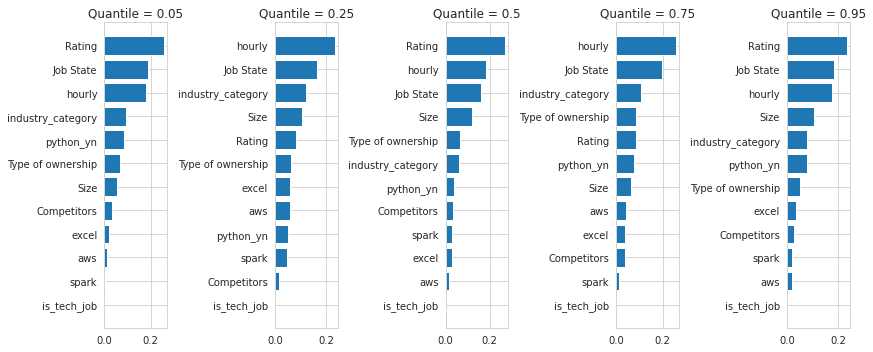

In [ ]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = rf_reg[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

### Industry: Technology

In [ ]:
##tech
x = df[df["industry_category"]==0]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==0]
y = y["avg_salary"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 677.2773323431742


Feature ranking:
1. Job State (0.304927)
2. Rating (0.146697)
3. Revenue (0.103647)
4. age (0.086988)
5. aws (0.079435)
6. Size (0.071424)
7. python_yn (0.058783)
8. excel (0.042807)
9. Type of ownership (0.040883)
10. spark (0.036259)
11. Competitors (0.028149)
12. hourly (0.000000)


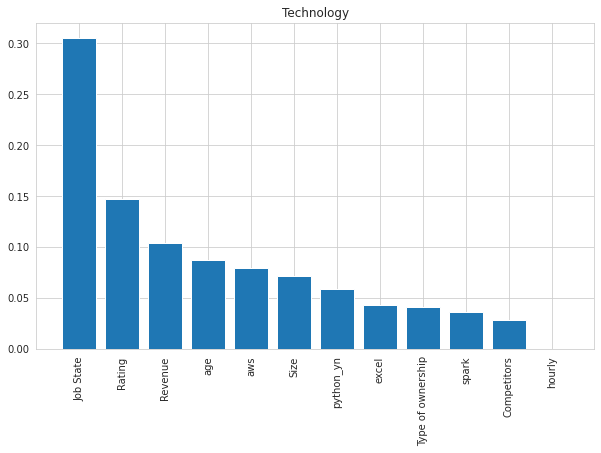

In [ ]:
# Get the feature importance scores
importances = rf_reg.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Technology")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.62
Test set RMSE of rf_reg: 26.02
Train set RMSE of rf_reg: 14.48


In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_train_pred_rf_reg = rf_reg.predict(X_train)

print("test set MSE:",metrics.mean_squared_error(y_test, y_pred_rf_reg))
print("train set MSE:",metrics.mean_squared_error(y_train, y_train_pred_rf_reg))

print("test set r2:",metrics.r2_score(y_test, y_pred_rf_reg))
print("train set r2:",metrics.r2_score(y_train, y_train_pred_rf_reg))

test set MSE: 677.2773323431742
train set MSE: 209.56261581317523
test set r2: 0.6217123913073498
train set r2: 0.8667448074484212


In [ ]:
### Quantile for Tech
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]
pred_Q = pd.DataFrame()
for pred in rf_reg.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)

RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,76.00,76.00,76.00,76.00,76.00,6.00,76.00
mean,75.13,96.64,114.41,126.11,151.95,108.92,76.83
std,22.95,32.72,37.50,36.41,33.06,27.97,34.54
min,29.50,47.00,47.00,70.50,78.10,66.50,0.22
25%,58.97,70.12,82.62,96.84,136.50,92.75,54.54
50%,69.00,91.50,110.50,125.69,149.88,114.00,77.44
75%,85.50,115.38,141.87,149.75,170.38,126.25,107.68
max,150.50,205.00,225.00,225.00,225.00,143.00,137.50


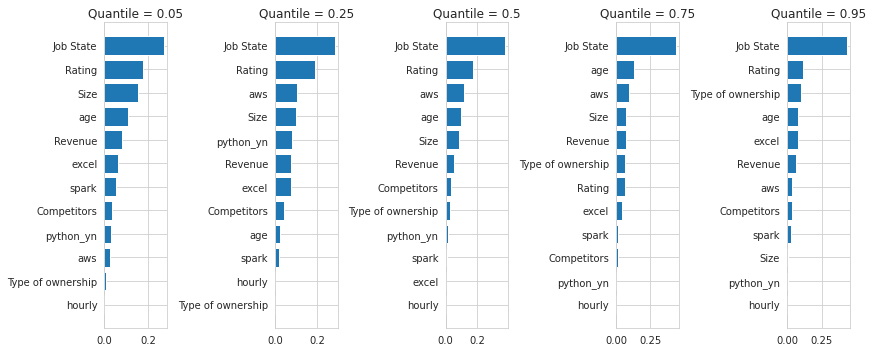

In [ ]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = rf_reg[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

###Industry: Finance

In [ ]:
## finance
x = df[df["industry_category"]==1]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==1]
y = y["avg_salary"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 796.4757455662868


Feature ranking:
1. Revenue (0.153784)
2. Job State (0.145256)
3. Rating (0.141473)
4. Size (0.126403)
5. hourly (0.101374)
6. age (0.081975)
7. Type of ownership (0.067491)
8. excel (0.047181)
9. spark (0.046391)
10. python_yn (0.033898)
11. Competitors (0.028112)
12. aws (0.026662)


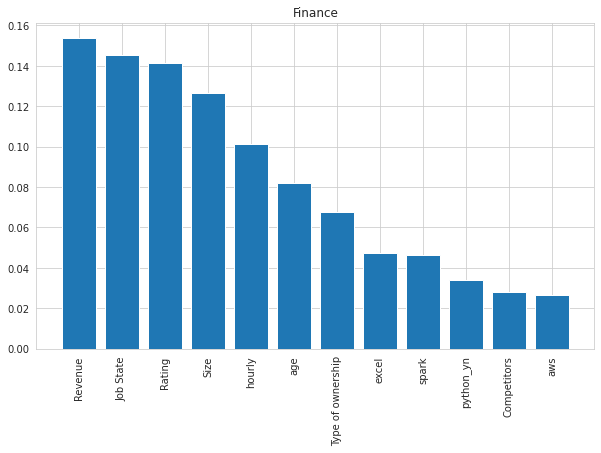

In [ ]:
# Get the feature importance scores
importances = rf_reg.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Finance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.13
Test set RMSE of rf_reg: 28.22
Train set RMSE of rf_reg: 12.33


In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_train_pred_rf_reg = rf_reg.predict(X_train)

print("test set MSE:",metrics.mean_squared_error(y_test, y_pred_rf_reg))
print("train set MSE:",metrics.mean_squared_error(y_train, y_train_pred_rf_reg))

print("test set r2:",metrics.r2_score(y_test, y_pred_rf_reg))
print("train set r2:",metrics.r2_score(y_train, y_train_pred_rf_reg))

test set MSE: 796.4757455662868
train set MSE: 152.10254461667273
test set r2: 0.12686595710871018
train set r2: 0.8712933494061693


In [ ]:
### Quantile for Finance
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]
pred_Q = pd.DataFrame()
for pred in rf_reg.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)

RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,75.00,75.00,75.00,75.00,75.00,8.00,75.00
mean,59.16,83.78,96.55,109.90,136.61,96.56,77.45
std,15.71,25.82,27.35,31.27,31.89,38.15,37.05
min,26.50,26.50,26.50,48.50,65.00,56.50,11.50
25%,49.01,65.00,80.50,95.00,122.65,73.38,59.32
50%,53.50,81.00,96.75,107.50,128.00,85.00,69.51
75%,66.62,97.50,114.00,123.56,139.71,107.75,88.21
max,107.50,161.50,161.50,237.50,237.50,163.50,197.00


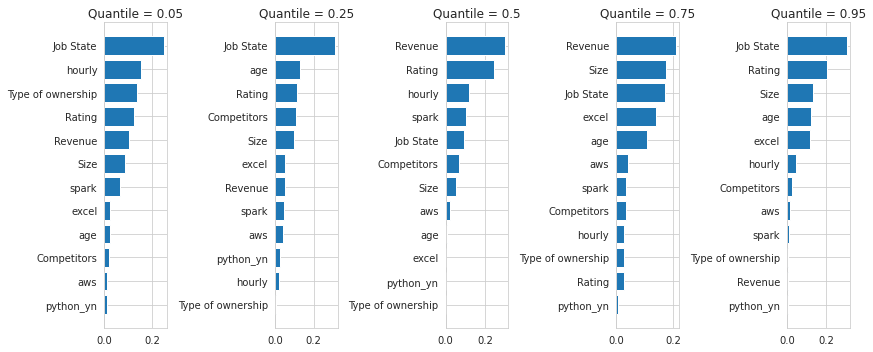

In [ ]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = rf_reg[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

###Industry: Manufacturing

In [ ]:
## Manufacturing
x = df[df["industry_category"]==2]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==2]
y = y["avg_salary"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 360.057116991289


Feature ranking:
1. hourly (0.389319)
2. Rating (0.153669)
3. Job State (0.126435)
4. Revenue (0.068810)
5. python_yn (0.065193)
6. Type of ownership (0.047768)
7. excel (0.036079)
8. aws (0.027488)
9. Size (0.025229)
10. age (0.024585)
11. Competitors (0.019659)
12. spark (0.015767)


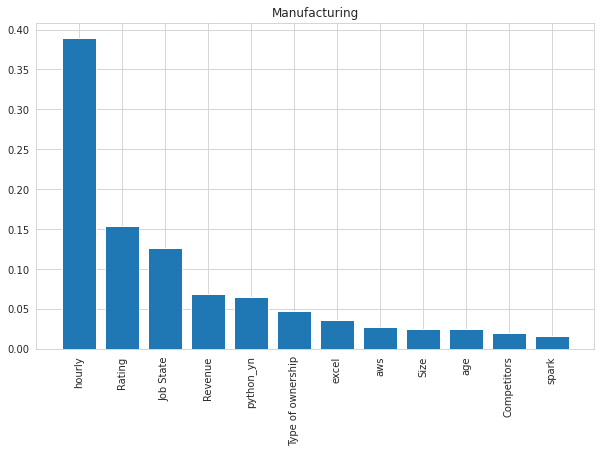

In [ ]:
# Get the feature importance scores
importances = rf_reg.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Manufacturing")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.75
Test set RMSE of rf_reg: 18.98
Train set RMSE of rf_reg: 12.75


In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_train_pred_rf_reg = rf_reg.predict(X_train)

print("test set MSE:",metrics.mean_squared_error(y_test, y_pred_rf_reg))
print("train set MSE:",metrics.mean_squared_error(y_train, y_train_pred_rf_reg))

print("test set r2:",metrics.r2_score(y_test, y_pred_rf_reg))
print("train set r2:",metrics.r2_score(y_train, y_train_pred_rf_reg))

test set MSE: 360.057116991289
train set MSE: 162.47884109946685
test set r2: 0.750208935832567
train set r2: 0.9066257929390306


In [ ]:
###Quantile for Manufacturing
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]
pred_Q = pd.DataFrame()
for pred in rf_reg.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)

RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,65.00,65.00,65.00,65.00,65.00,3.00,65.00
mean,70.00,85.87,94.86,106.34,129.20,124.50,59.21
std,20.03,30.54,35.73,41.53,48.62,19.92,36.56
min,21.50,21.50,21.50,21.50,21.80,112.50,0.00
25%,64.00,70.50,75.10,81.56,100.00,113.00,23.50
50%,70.50,81.00,87.50,102.25,147.50,113.50,66.50
75%,83.85,102.00,119.50,133.50,167.50,130.50,83.00
max,106.50,154.50,169.00,221.50,221.50,147.50,135.00


In [ ]:
RF_actual_pred[np.max(quantiles)]

12    27.50
56    27.50
42    21.80
13    90.50
36    81.00
      ...  
0    174.00
52   174.00
29   221.50
3    221.50
27   221.50
Name: 0.95, Length: 65, dtype: float64

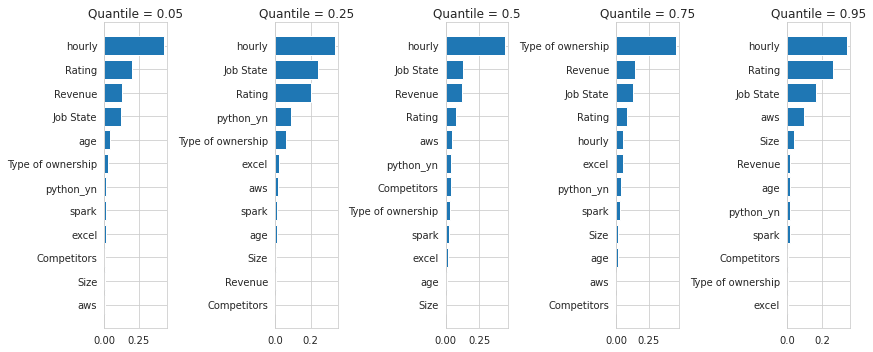

In [ ]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = rf_reg[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

###Industry: Healthcare

In [ ]:
## Healthcare
x = df[df["industry_category"]==3]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==3]
y = y["avg_salary"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1044.056154833531


Feature ranking:
1. python_yn (0.253598)
2. Job State (0.164521)
3. Rating (0.157395)
4. age (0.112102)
5. Revenue (0.099704)
6. Competitors (0.055099)
7. Size (0.048302)
8. excel (0.046993)
9. Type of ownership (0.034335)
10. spark (0.014279)
11. aws (0.012918)
12. hourly (0.000754)


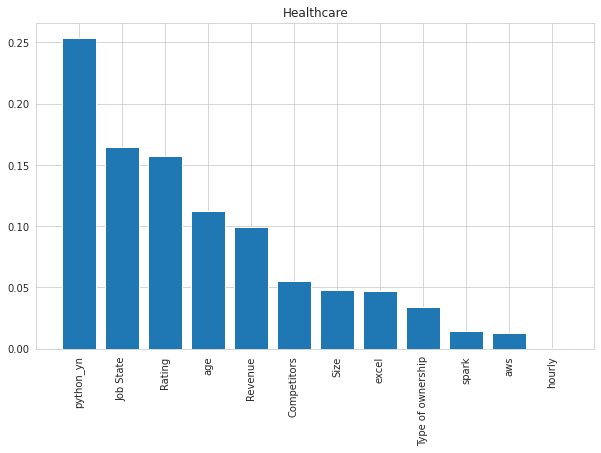

In [ ]:
# Get the feature importance scores
importances = rf_reg.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Healthcare")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.62
Test set RMSE of rf_reg: 32.31
Train set RMSE of rf_reg: 14.07


In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_train_pred_rf_reg = rf_reg.predict(X_train)

print("test set MSE:",metrics.mean_squared_error(y_test, y_pred_rf_reg))
print("train set MSE:",metrics.mean_squared_error(y_train, y_train_pred_rf_reg))

print("test set r2:",metrics.r2_score(y_test, y_pred_rf_reg))
print("train set r2:",metrics.r2_score(y_train, y_train_pred_rf_reg))

test set MSE: 1044.056154833531
train set MSE: 198.00151330010308
test set r2: 0.6189345303281941
train set r2: 0.8744895794937171


In [ ]:
###Quantile for Healthcare
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]
pred_Q = pd.DataFrame()
for pred in rf_reg.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)

RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,44.00,44.00,44.00,44.00,44.00,3.00,44.00
mean,63.95,85.75,111.16,128.15,160.22,78.17,96.27
std,20.86,28.10,56.29,57.73,49.83,27.23,52.46
min,13.50,13.50,13.50,45.50,90.00,47.50,28.97
25%,49.00,60.84,66.50,89.44,126.87,67.50,59.37
50%,62.30,88.50,104.00,115.50,147.91,87.50,83.44
75%,82.00,107.88,129.50,147.00,173.00,93.50,114.65
max,110.32,144.88,254.00,254.00,254.00,99.50,205.00


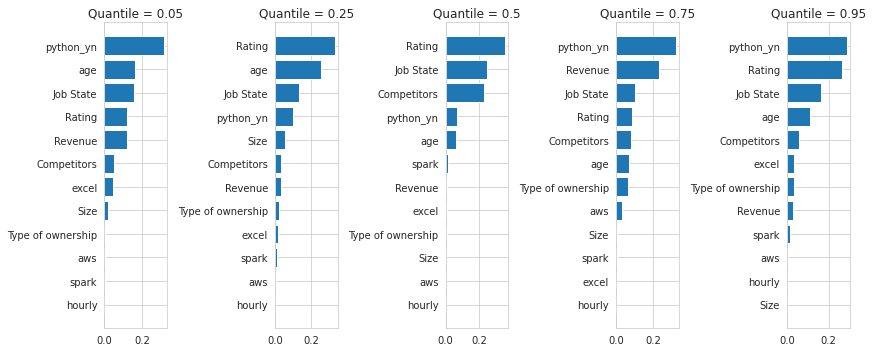

In [ ]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = rf_reg[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

###Industry: Other

In [ ]:
## Other industry
x = df[df["industry_category"]==4]
x = x.drop(columns = ["avg_salary","industry_category","is_tech_job"])
y = df[df["industry_category"]==4]
y = y["avg_salary"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=rf_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 329.3445945450064


Feature ranking:
1. Job State (0.269931)
2. Rating (0.174779)
3. Size (0.139976)
4. Revenue (0.087526)
5. age (0.079032)
6. python_yn (0.076494)
7. excel (0.072189)
8. Competitors (0.044364)
9. Type of ownership (0.032704)
10. spark (0.018125)
11. aws (0.004879)
12. hourly (0.000000)


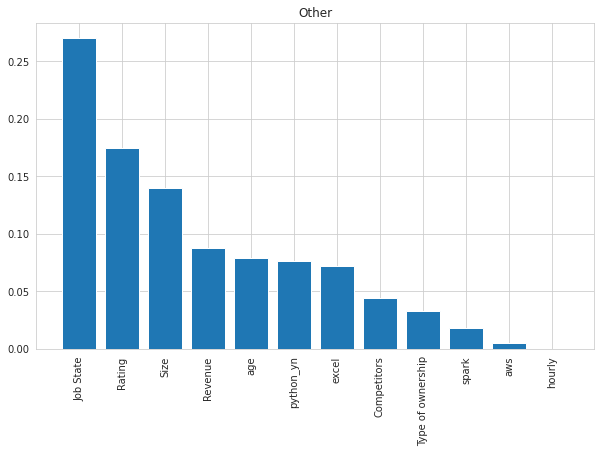

In [ ]:
# Get the feature importance scores
importances = rf_reg.feature_importances_

# Sort the feature importance scores in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Other")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [ ]:
# Evaluate the test set RMSE
rmse_test_rf_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_rf_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_rf_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of linear reg: {:.2f}'.format(train_rsquare_rf_reg))
print('Test set RMSE of rf_reg: {:.2f}'.format(rmse_test_rf_reg))
print('Train set RMSE of rf_reg: {:.2f}'.format(rmse_train_rf_reg))

Train set R square of linear reg: 0.48
Test set RMSE of rf_reg: 18.15
Train set RMSE of rf_reg: 10.21


In [ ]:
y_pred_rf_reg = rf_reg.predict(X_test)
y_train_pred_rf_reg = rf_reg.predict(X_train)

print("test set MSE:",metrics.mean_squared_error(y_test, y_pred_rf_reg))
print("train set MSE:",metrics.mean_squared_error(y_train, y_train_pred_rf_reg))

print("test set r2:",metrics.r2_score(y_test, y_pred_rf_reg))
print("train set r2:",metrics.r2_score(y_train, y_train_pred_rf_reg))

test set MSE: 329.3445945450064
train set MSE: 104.33020277860682
test set r2: 0.4750489121809529
train set r2: 0.8330202655690956


In [ ]:
###Quantile for Other Industries
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]
pred_Q = pd.DataFrame()
for pred in rf_reg.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp],axis=1)
RF_actual_pred = pd.DataFrame()

for q in quantiles:
    s = pred_Q.quantile(q=q, axis=1)
    RF_actual_pred = pd.concat([RF_actual_pred,s],axis=1,sort=False)

RF_actual_pred.columns=quantiles
RF_actual_pred['actual'] = y_test
RF_actual_pred['interval'] = RF_actual_pred[np.max(quantiles)] - RF_actual_pred[np.min(quantiles)]
RF_actual_pred = RF_actual_pred.sort_values('interval')
RF_actual_pred = RF_actual_pred.round(2)
RF_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,34.00,34.00,34.00,34.00,34.00,2.00,34.00
mean,63.21,77.28,90.74,101.68,121.88,98.25,58.67
std,15.13,19.10,27.91,24.64,28.71,20.15,33.04
min,44.00,44.00,52.50,52.50,76.50,84.00,0.00
25%,52.50,61.00,72.53,90.88,104.56,91.12,30.37
50%,58.88,73.00,91.48,102.13,111.54,98.25,53.51
75%,73.00,96.00,102.84,109.50,130.00,105.38,74.50
max,98.00,118.50,173.00,173.00,173.00,112.50,120.92


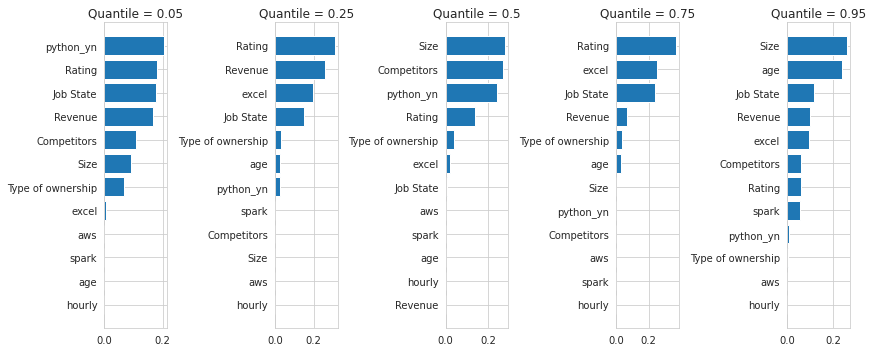

In [ ]:
fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    feature_importance = rf_reg[i].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

# Model: xgb


In [ ]:
x = df.drop(columns = ["avg_salary"])
y = df["avg_salary"]

In [ ]:
##xgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
xgb_reg = xgb.XGBRegressor()

# Fit the model on the training data
xgb_reg = xgb.XGBRegressor().fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_reg.predict(X_test)

# Make predictions on the train data
y_pred_train=xgb_reg.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 603.3072686450669


In [ ]:
# Evaluate the test set RMSE
rmse_test_xgb_reg = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_xgb_reg = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_xgb_reg  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of xgb_reg: {:.2f}'.format(train_rsquare_xgb_reg))
print('Test set RMSE of xgb_reg: {:.2f}'.format(rmse_test_xgb_reg))
print('Train set RMSE of xgb_reg: {:.2f}'.format(rmse_train_xgb_reg))

Train set R square of xgb_reg: 0.57
Test set RMSE of xgb_reg: 24.56
Train set RMSE of xgb_reg: 7.19


# Model: Decision Tree


In [ ]:
x = df.drop(columns = ["avg_salary"])
y = df["avg_salary"]

In [ ]:
##Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Random Forest regressor with default hyperparameters
clf = DecisionTreeRegressor()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Make predictions on the train data
y_pred_train=clf.predict(X_train)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1048.951033371255


In [ ]:
# Evaluate the test set RMSE
rmse_test_clf = mean_squared_error(y_test, y_pred)**(1/2)
rmse_train_clf = mean_squared_error(y_train, y_pred_train)**(1/2)
train_rsquare_clf  = metrics.r2_score(y_test, y_pred)

# Print the test set RMSE
print('Train set R square of decision tree: {:.2f}'.format(train_rsquare_clf))
print('Test set RMSE of clf: {:.2f}'.format(rmse_test_clf))
print('Train set RMSE of clf: {:.2f}'.format(rmse_train_clf))

Train set R square of decision tree: 0.25
Test set RMSE of clf: 32.39
Train set RMSE of clf: 7.11


# Quantiles Models Prep


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

OLS = LinearRegression()
OLS.fit(X_train, y_train)

# model evaluation for testing set
y_test_predict = OLS.predict(X_test)
r2 = metrics.r2_score(y_test, y_test_predict).round(2)
print('R2 score is {}'.format(r2) )

R2 score is 0.25


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]

# Derive the model and the predictions in (a) - (b)
def GBM(q):

   # (a) Modeling
   mod = GradientBoostingRegressor(loss='quantile', alpha=q,
                                n_estimators=500, max_depth=8,
                                learning_rate=.01, min_samples_leaf=20,
                                min_samples_split=20)
   mod.fit(X_train, y_train)

   # (b) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return pred, mod

GBM_models=[]
GBM_actual_pred = pd.DataFrame()

for q in quantiles:
    pred , model = GBM(q)
    GBM_models.append(model)
    GBM_actual_pred = pd.concat([GBM_actual_pred,pred],axis=1)

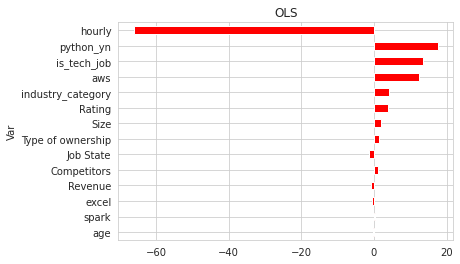

In [ ]:
# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = X_train.columns
# Set the variable names as the index
w = w.set_index('Var')
w['beta'] = OLS.coef_
# Get the absolute value for ranking
w['beta_abs'] = np.abs(w['beta'])
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh(color='red')
plt.title('OLS')
#fig.tight_layout()
plt.show()

In [ ]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt
quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]

# Derive the model, the cofficients and the predictions in (a) - (c)
def Qreg(q):
   # (a) Modeling
   mod = Q_reg.QuantReg(y_train, X_train).fit(q=q)

   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   # "mod.conf_int" will give the lower and upper bounds
   coefs = pd.concat([coefs,mod.conf_int()],axis=1)
   coefs['q'] = q
   coefs.columns = ['beta','beta_lower','beta_upper','quantile']

   return coefs

Qreg_coefs = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



In [ ]:
q = 0.5
y_test_pred = Q_reg.QuantReg(y_train, X_train).fit(q=q).predict(X_test)
r2 = metrics.r2_score(y_test,y_test_pred)
print('Rsquare score is {}'.format(r2) )

Rsquare score is 0.11994094762074481


In [ ]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

quantiles = [0.05, 0.25, 0.50, 0.75 , 0.95]

# Derive the model, the cofficients and the predictions in (a) - (c)
def Qreg(q):
   # (a) Modeling
   mod = Q_reg.QuantReg(y_train, X_train).fit(q=q)

   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   # "mod.conf_int" will give the lower and upper bounds
   coefs = pd.concat([coefs,mod.conf_int()],axis=1)
   coefs['q'] = q
   coefs.columns = ['beta','beta_lower','beta_upper','quantile']

   # (c) Predictions
   pred = pd.Series(mod.predict(X_test).round(2))
   return coefs, pred

Qreg_coefs = pd.DataFrame()
Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefs, pred = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])
    Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred.columns=quantiles
Qreg_actual_pred['actual'] = y_test
Qreg_actual_pred['interval'] = Qreg_actual_pred[0.95] - Qreg_actual_pred[0.05]
Qreg_actual_pred = Qreg_actual_pred.sort_values('interval').reset_index(drop=True)
Qreg_actual_pred

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



,0.05,0.25,0.5,0.75,0.95,actual,interval
0,19.47,35.63,49.64,53.78,54.58,96.50,35.11
1,-15.93,-22.17,-20.50,-4.42,20.79,25.00,36.72
2,-15.93,-22.17,-20.50,-4.42,20.79,25.00,36.72
3,43.66,55.26,70.79,86.32,80.71,65.50,37.05
4,43.66,55.26,70.79,86.32,80.71,65.50,37.05
...,...,...,...,...,...,...,...
288,63.54,103.53,127.46,168.66,226.88,232.50,163.34
289,57.86,88.74,115.85,150.47,228.90,113.50,171.04
290,78.54,102.65,122.77,161.49,250.76,88.00,172.22
291,59.96,85.78,110.92,145.87,233.13,162.00,173.17


In [ ]:
r2 = metrics.r2_score(Qreg_actual_pred['actual'], Qreg_actual_pred[0.5]).round(2)
print('Rsquare score is {}'.format(r2) )

Rsquare score is 0.12


<Figure size 1440x360 with 0 Axes>

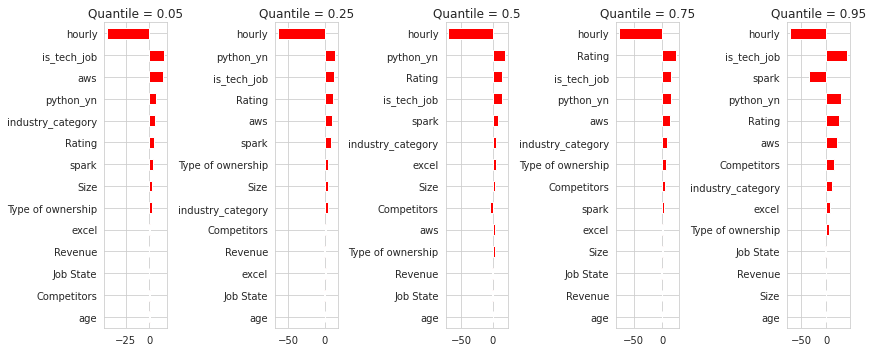

In [ ]:
plt.figure(figsize=(20, 5))
# Derive the absolute value of the coefficients for ranking
Qreg_coefs['beta_abs'] = np.abs(Qreg_coefs['beta'] )
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','beta_abs'])

fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['beta'].plot.barh(color='red')
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

In [ ]:
x2 = df.drop(columns = ['age', 'Revenue'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.4, random_state=0)

In [ ]:
Qreg_coefs = pd.DataFrame()
Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefs, pred = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])
    Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred.columns=quantiles
Qreg_actual_pred['actual'] = y_test
Qreg_actual_pred['interval'] = Qreg_actual_pred[0.95] - Qreg_actual_pred[0.05]
Qreg_actual_pred = Qreg_actual_pred.sort_values('interval').reset_index(drop=True)
Qreg_actual_pred

,0.05,0.25,0.5,0.75,0.95,actual,interval
0,52.50,52.50,52.50,52.50,52.50,52.50,0.00
1,165.00,165.00,165.00,165.00,165.00,165.00,0.00
2,101.00,101.00,101.00,101.00,101.00,101.00,0.00
3,122.50,122.50,122.50,122.50,122.50,122.50,0.00
4,84.00,84.00,84.00,84.00,84.00,84.00,0.00
...,...,...,...,...,...,...,...
288,95.00,95.00,95.00,95.00,95.00,95.00,0.00
289,66.50,66.50,66.50,66.50,66.50,66.50,0.00
290,62.50,62.50,62.50,62.50,62.50,62.50,0.00
291,147.00,147.00,147.00,147.00,147.00,147.00,0.00


In [ ]:
r2 = metrics.r2_score(Qreg_actual_pred['actual'], Qreg_actual_pred[0.5]).round(2)
print('Rsquare score is {}'.format(r2) )

Rsquare score is 1.0


<Figure size 1440x360 with 0 Axes>

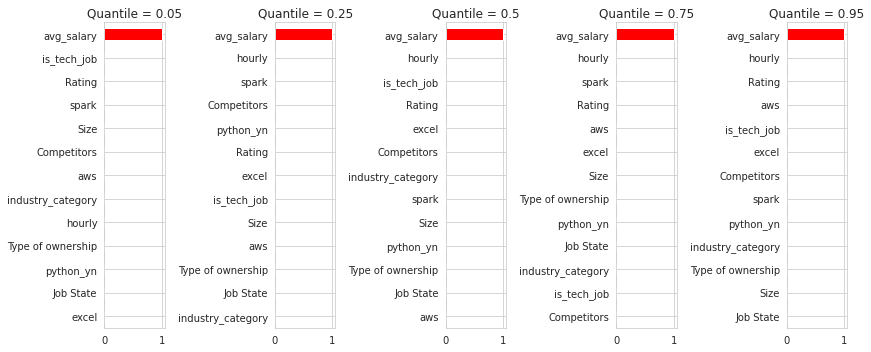

In [ ]:
plt.figure(figsize=(20, 5))
# Derive the absolute value of the coefficients for ranking
Qreg_coefs['beta_abs'] = np.abs(Qreg_coefs['beta'] )
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','beta_abs'])

fig = plt.figure(figsize=(12, 5))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['beta'].plot.barh(color='red')
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

In [ ]:
##Is tech
df_is_tech = df[df['is_tech_job'] == 1]
df_is_tech.head()

,Rating,Size,Type of ownership,Revenue,Competitors,hourly,avg_salary,age,python_yn,spark,aws,excel,Job State,industry_category,is_tech_job
9,4.60,4,0,2,1,0,140.00,38.00,1,1,0,0,2,0,1
17,4.30,3,0,0,0,0,153.50,38.00,1,1,1,1,0,0,1
18,4.20,4,0,0,0,0,142.50,38.00,0,0,0,0,0,0,1
20,3.20,3,0,0,1,0,105.50,38.00,1,1,0,0,8,0,1
24,4.00,1,0,2,1,0,143.00,38.00,1,0,1,0,3,0,1


In [ ]:
x = df_is_tech.drop(columns = ["avg_salary", "age", "Revenue"])
y = df_is_tech["avg_salary"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
Qreg_coefs = pd.DataFrame()
Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefs, pred = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])
    Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred.columns=quantiles
Qreg_actual_pred['actual'] = y_test
Qreg_actual_pred['interval'] = Qreg_actual_pred[0.95] - Qreg_actual_pred[0.05]
Qreg_actual_pred = Qreg_actual_pred.sort_values('interval').reset_index(drop=True)
Qreg_actual_pred

,0.05,0.25,0.5,0.75,0.95,actual,interval
0,62.25,93.06,94.63,92.12,93.96,88.50,31.71
1,70.50,87.94,94.28,103.69,110.94,60.50,40.44
2,44.09,56.33,70.55,97.90,97.57,87.00,53.48
3,57.79,65.69,61.73,77.39,113.39,77.50,55.60
4,87.77,96.00,105.49,127.13,145.93,66.50,58.16
...,...,...,...,...,...,...,...
67,74.56,92.22,138.53,178.27,221.30,88.00,146.74
68,66.55,102.72,138.01,159.20,216.82,85.50,150.27
69,83.89,109.07,162.45,235.29,237.08,177.00,153.19
70,55.27,74.24,112.58,166.16,208.95,147.00,153.68


In [ ]:
Qreg_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,72.00,72.00,72.00,72.00,72.00,72.00,72.00
mean,70.21,94.82,119.04,142.47,174.02,112.74,103.81
std,16.85,22.46,27.38,28.82,37.05,40.48,30.09
min,20.42,22.39,34.84,77.39,83.40,48.00,31.71
25%,61.50,81.71,105.47,128.11,148.20,81.38,81.24
50%,69.85,96.00,119.71,142.51,178.69,109.25,103.72
75%,82.15,113.45,142.00,161.13,201.28,142.62,126.03
max,105.65,133.39,162.45,235.29,237.08,225.00,162.93


In [ ]:
##Non_tech
df_non_tech = df[df['is_tech_job'] == 0]
df_non_tech.head()


,Rating,Size,Type of ownership,Revenue,Competitors,hourly,avg_salary,age,python_yn,spark,aws,excel,Job State,industry_category,is_tech_job
0,3.80,1,0,5,0,0,72.00,47.00,1,0,0,1,31,4,0
1,3.40,2,7,6,0,0,87.50,36.00,1,0,0,0,5,2,0
2,4.80,1,0,2,0,0,85.00,38.00,1,1,0,1,11,1,0
3,3.80,0,4,4,1,0,76.50,55.00,1,0,0,0,8,4,0
4,2.90,4,0,0,1,0,114.50,22.00,1,0,0,1,2,1,0


In [ ]:
x = df_non_tech.drop(columns = ["avg_salary", "age", "Revenue"])
y = df_non_tech["avg_salary"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
Qreg_coefs = pd.DataFrame()
Qreg_actual_pred = pd.DataFrame()

# Get the actual and quantile predictions
for q in quantiles:
    coefs, pred = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])
    Qreg_actual_pred = pd.concat([Qreg_actual_pred,pred],axis=1)

Qreg_actual_pred.columns=quantiles
Qreg_actual_pred['actual'] = y_test
Qreg_actual_pred['interval'] = Qreg_actual_pred[0.95] - Qreg_actual_pred[0.05]
Qreg_actual_pred = Qreg_actual_pred.sort_values('interval').reset_index(drop=True)
Qreg_actual_pred

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning:

Maximum number of iterations (1000) reached.



,0.05,0.25,0.5,0.75,0.95,actual,interval
0,49.44,51.00,62.48,72.33,83.58,65.50,34.14
1,70.62,64.02,90.00,107.49,108.16,90.00,37.54
2,-10.89,0.45,7.18,27.50,27.50,27.50,38.39
3,-10.89,0.45,7.18,27.50,27.50,27.50,38.39
4,-10.89,0.45,7.18,27.50,27.50,27.50,38.39
...,...,...,...,...,...,...,...
217,59.69,79.97,89.56,142.88,212.39,71.50,152.70
218,57.20,96.20,121.87,155.92,210.54,167.50,153.34
219,65.72,84.67,113.42,157.67,223.02,85.50,157.30
220,62.29,94.33,109.45,148.66,222.47,75.50,160.18


In [ ]:
Qreg_actual_pred.describe()

,0.05,0.25,0.5,0.75,0.95,actual,interval
count,222.00,222.00,222.00,222.00,222.00,222.00,222.00
mean,52.96,73.64,95.15,119.29,155.85,94.10,102.90
std,19.19,19.72,23.17,26.39,37.50,37.71,27.49
min,-29.26,-1.92,0.26,20.61,27.50,21.50,34.14
25%,43.58,64.56,85.78,104.46,132.87,67.38,82.37
50%,53.41,75.48,96.71,121.10,156.85,88.75,103.26
75%,64.86,84.50,109.14,136.19,182.71,112.50,123.79
max,104.60,113.13,149.72,174.31,232.60,254.00,164.13
